# Project
### Thi My hao PHAM


(If you have error with SimpleImputer, please upgrade install scikit, using code below)

In [304]:
# !pip install -U scikit-learn

(If you have error with bar_label, please upgrade matplotlib, using code below)

In [305]:
# !pip install matplotlib --upgrade 
# !pip uninstall matplotlib anaconda -y
# !pip install matplotlib==3.4

In [306]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib.ticker as mtick


sns.set()

plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['image.cmap'] = 'viridis'
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')  

In [307]:
# create a Spark session


# Load and Clean Dataset
In this workspace, the mini-dataset file is `/kaggle/input/online-shoppers-intention/online_shoppers_intention.csv`. Load and clean the dataset, checking for invalid or missing data

In [308]:
# https://archive-beta.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset
df = pd.read_csv('datasets/online_shoppers_intention.csv')
# df = pd.read_csv('/kaggle/input/online-shoppers-intention/online_shoppers_intention.csv')

df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [309]:
df.shape

(12330, 18)

In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [311]:
num_cols = [x for x in df.select_dtypes(include=np.number)]
cat_cols = [x for x in df.select_dtypes(exclude=np.number)]
print("There are", len(num_cols), "numerical columns and", len(cat_cols), "categorical columns in the dataset\n")
print("Numerical columns:", num_cols)
print("Categorical columns:", cat_cols)

There are 14 numerical columns and 4 categorical columns in the dataset

Numerical columns: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']
Categorical columns: ['Month', 'VisitorType', 'Weekend', 'Revenue']


# Exploratory Data Analysis


In [312]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [313]:
df['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

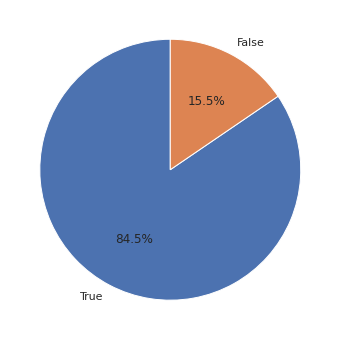

In [314]:
### % of True and false
labels = [True, False]
values = df['Revenue'].value_counts().values
fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=False,startangle=90)
plt.show()

=> Conversion rate: 15.5%

In [315]:
num_cols

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType']

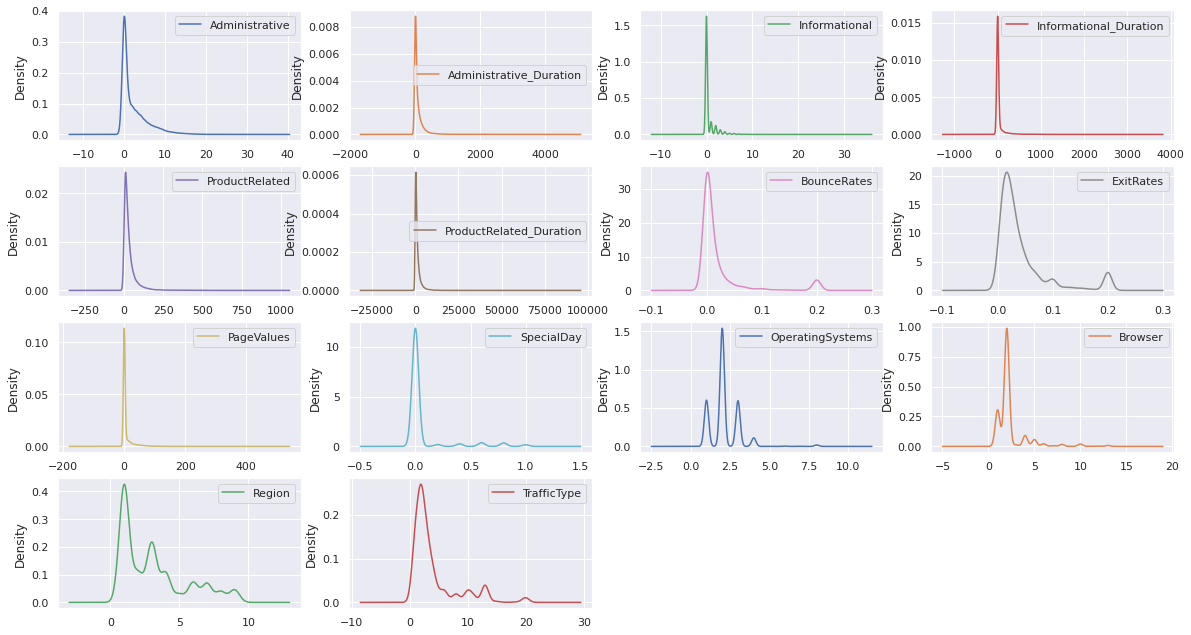

In [316]:
df[num_cols].plot(kind='density', subplots=True, layout=(4,4), sharex=False, figsize=(20, 11));

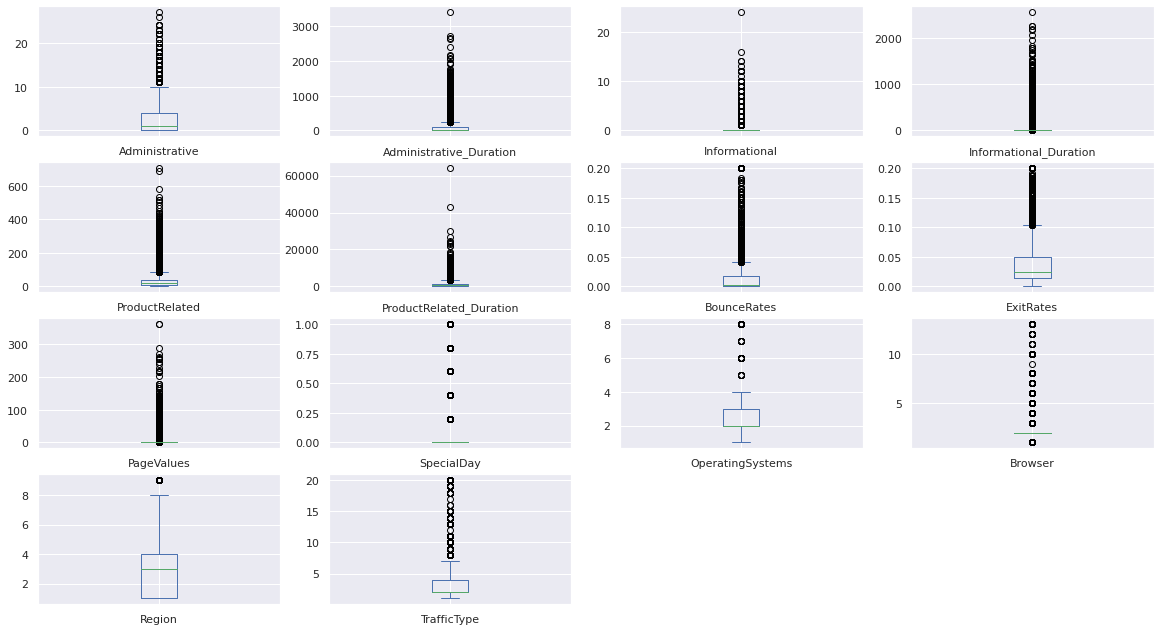

In [317]:
df[num_cols].plot(kind='box', subplots=True, layout=(4,4), 
                  sharex=False, figsize=(20, 11));

In [318]:
def show_count_plot(df, col, rotation = 0, figsize=(12,6), hue=None, color = 'orange'):
    plt.figure(figsize=figsize)
    ax = sns.countplot(x=df[col],
                   order=df[col].value_counts(ascending=False).head(10).index, hue=hue, color=color)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=rotation, size=22) 
    ax.set_yticklabels(ax.get_yticklabels(),rotation=rotation, size=22) 
#     ax.set_yticklabels(size=22)  
    ax.set_ylabel('Count',size=25) 
    ax.set_xlabel(col,size=25) 
    abs_values = df[col].value_counts(ascending=False).head(10)
    rel_values = df[col].value_counts(ascending=False, normalize=True).head(10).values * 100
    labels = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
    ax.bar_label(container=ax.containers[0], labels=labels, size=22)

#### Administrative

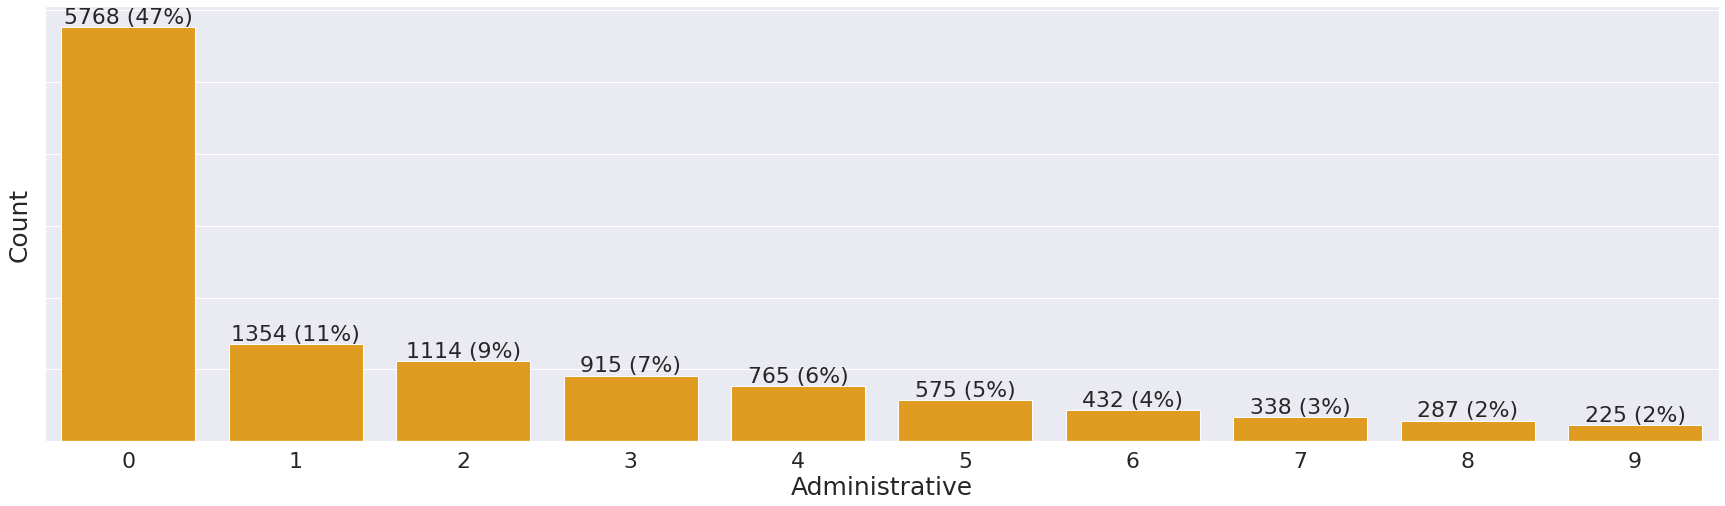

In [319]:
show_count_plot(df,'Administrative', figsize=(30,8))

=> Approximately 50% visitors didn't visit any Administrative pages.

#### Informational

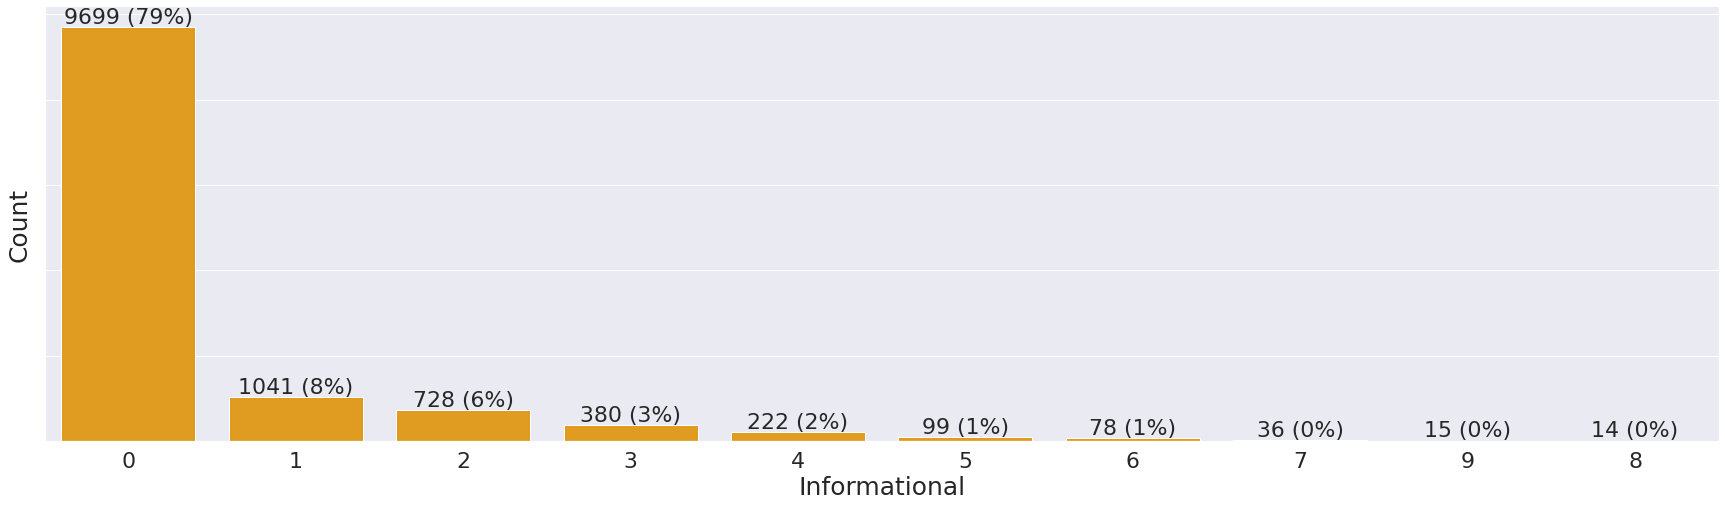

In [320]:
show_count_plot(df,'Informational', figsize=(30,8))

=> Only more than 20% visitors visit at least 1 Informational page.

#### SpecialDay

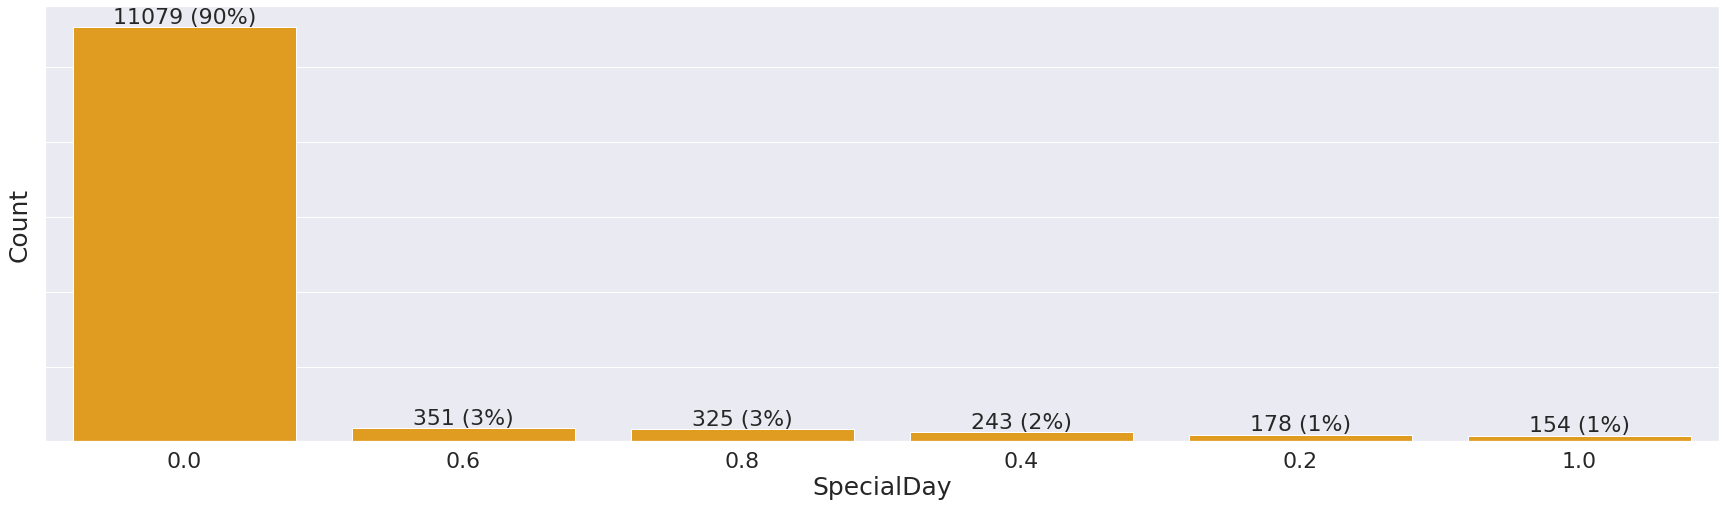

In [321]:
show_count_plot(df,'SpecialDay', figsize=(30,8))

=> 90% number of visitors visiting website is not affected by SpecialDay

#### OperatingSystems

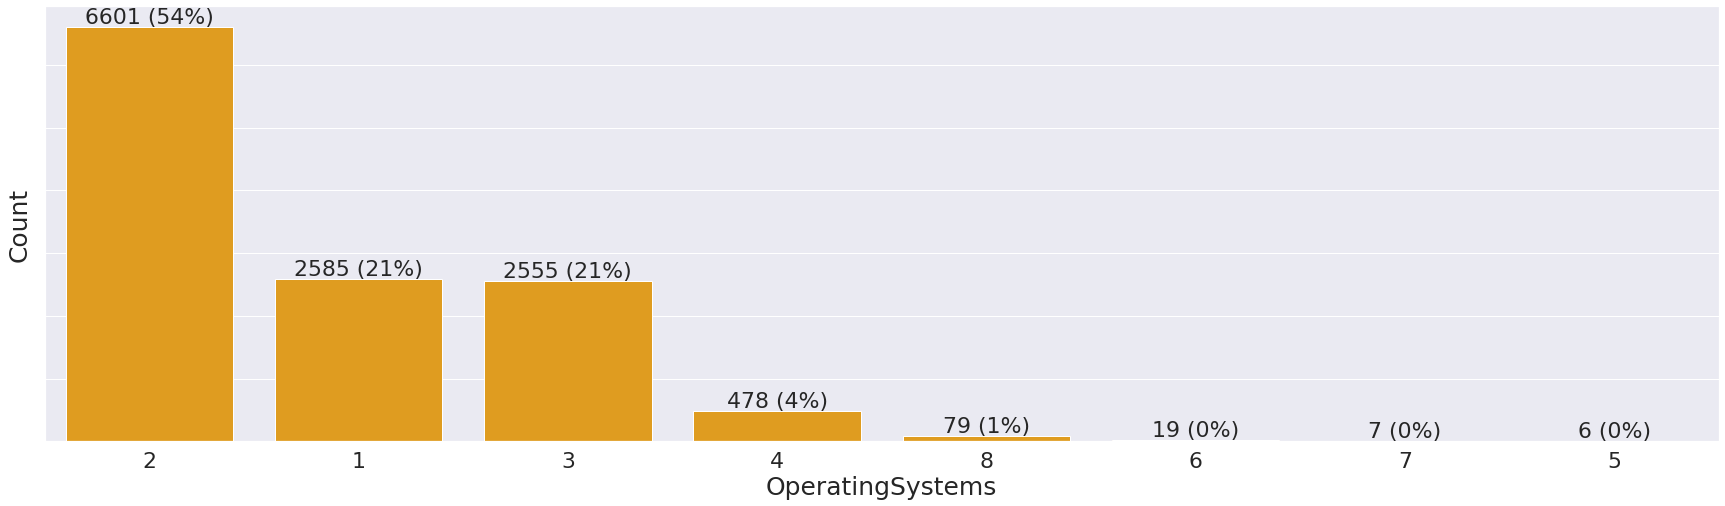

In [322]:
show_count_plot(df,'OperatingSystems', figsize=(30,8))

==> Top 3 OS: 2, 1, 3. More than 50% web visitors use 2.

#### Browser

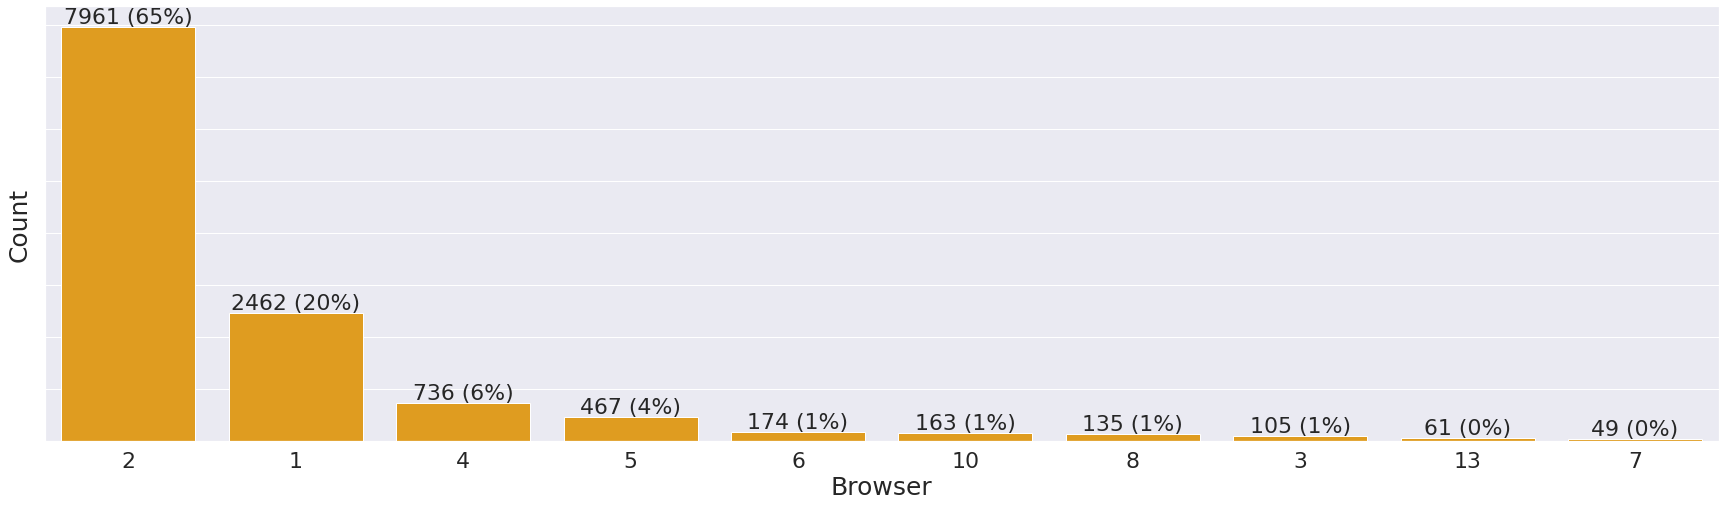

In [323]:
show_count_plot(df,'Browser', figsize=(30,8))

=> Top 3 browsers: 2, 1, 4  ====> 65% of visitors come from number 2 and more than 85% of visitors come from number 2 and 1. We can make website to more appealing, interactive and responsive to these browsers.

#### Region

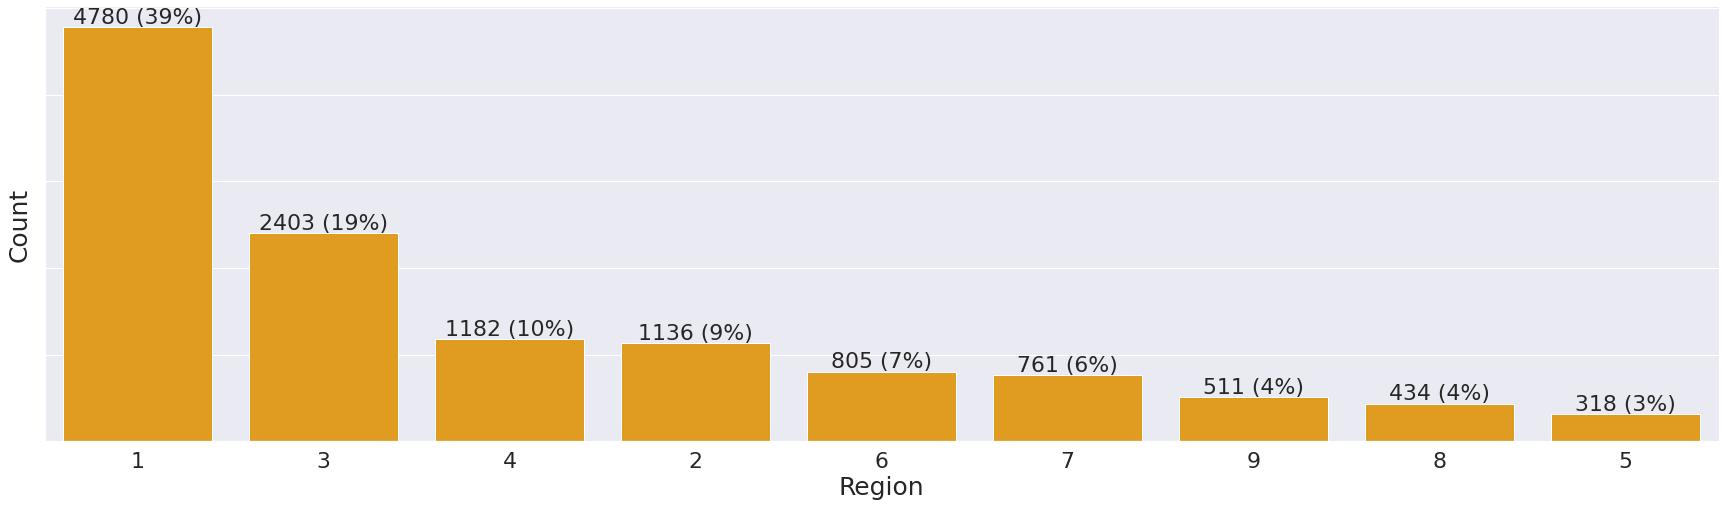

In [324]:
show_count_plot(df,'Region', figsize=(30,8))

=> ~40% number of visitors visiting website is in region 1

In [325]:
cat_cols

['Month', 'VisitorType', 'Weekend', 'Revenue']

#### Month

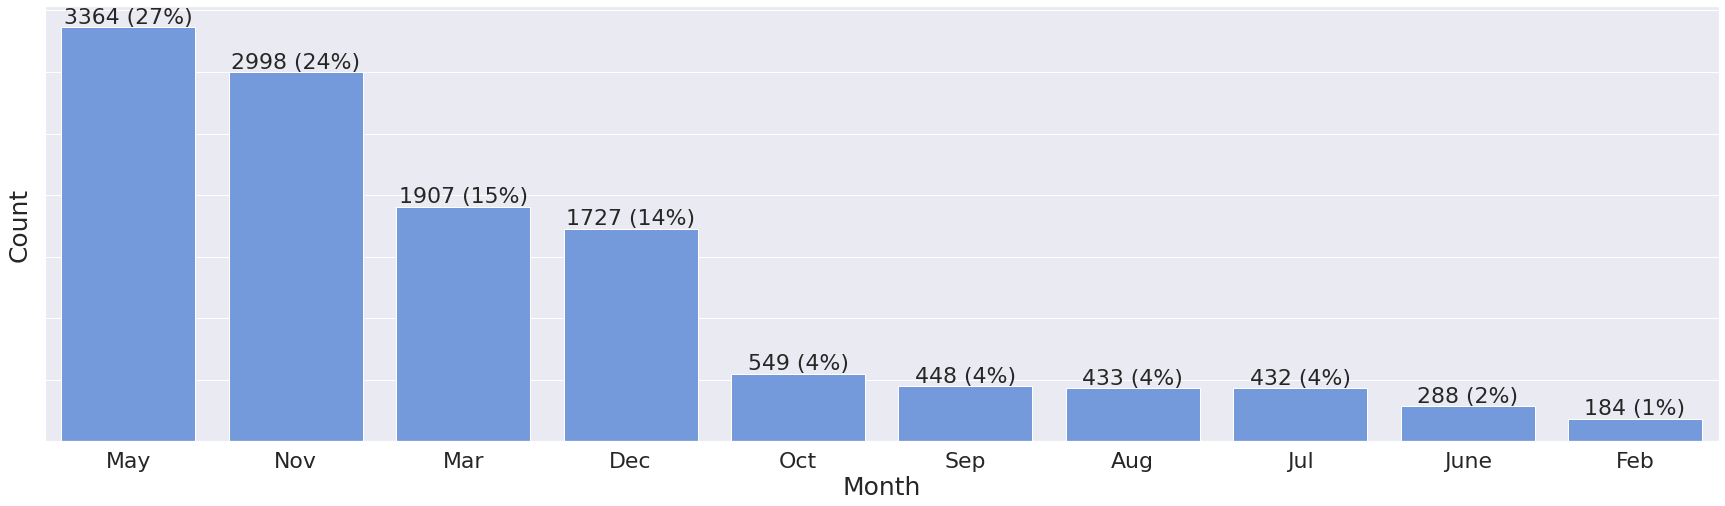

In [326]:
show_count_plot(df, 'Month',figsize=(30,8),  color = 'CornflowerBlue')

=> Top 3 months have highest web access are May, Nov, Mar

In [327]:
# import matplotlib.ticker as mtick

def show_count_plot_small(df, col, rotation = 0, figsize = (8,5), hue=None, colors= 'CornflowerBlue'):
    
    plt.figure(figsize = figsize )
    # colors = ['#d66354','#5486d6']

    ax1 = (df[col].value_counts()*100.0 /len(df)).plot(kind='bar', stacked = True,
                        rot = 0,color=colors)

    ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax1.set_ylabel('% Sessions')
    ax1.set_xlabel(col)
    ax1.set_title(col + ' Analysis')
    totals = []

    for i in ax1.patches:
        totals.append(i.get_width())

    total = sum(totals)

    for i in ax1.patches:
        ax1.text(i.get_x()+.17, i.get_height()-5.5, \
                str(round((i.get_height()/total), 1))+'%',
                fontsize=14,
                color='white',
                weight = 'bold')

In [328]:
def show_count_plot_small(df, col, rotation = 0, figsize=(12,5), hue=None, colors= 'CornflowerBlue'):
  plt.figure(figsize=figsize)
  ax = sns.countplot(x=df[col],
                   order=df[col].value_counts(ascending=False).index, hue=hue, color = colors);
  ax.set_xticklabels(ax.get_xticklabels(),rotation=rotation)      
  abs_values = df[col].value_counts(ascending=False)
  rel_values = df[col].value_counts(ascending=False, normalize=True).values * 100
  lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
  ax.bar_label(container=ax.containers[0], labels=lbls)

#### VisitorType

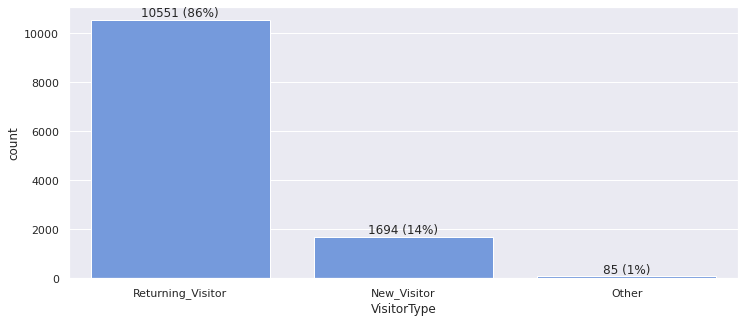

In [329]:
show_count_plot_small(df, 'VisitorType')

=> 86% Returning_Visitor và 14% New_Visitor => It's a good sign that main part of visitors are returning to our web site.

#### Weekend

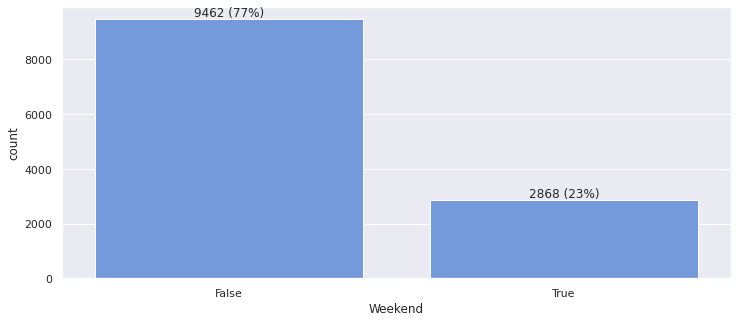

In [330]:
show_count_plot_small(df, 'Weekend')

=> 77% of visitor do not visite in weekend and 23% of visitor visite in weekend.
We have 5 week day and 2 weekend day so it not difference between weekday and weekend

#### Revenue

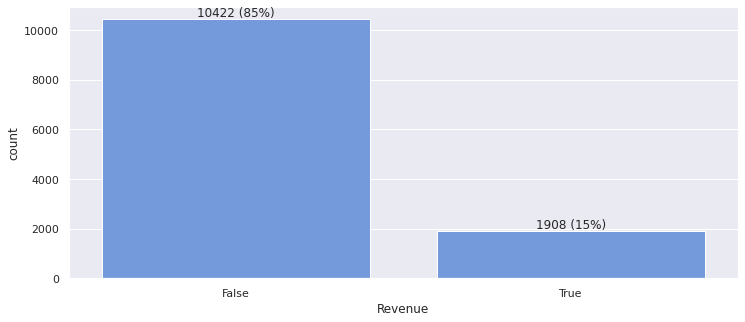

In [331]:
show_count_plot_small(df, 'Revenue')

=> 85% of visitor results in no revenue and 15% of visitor results in revenue making it an imbalanced dataset.

# Feature Engineering


In [332]:
df['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [333]:
Month={'Feb':2, 'Mar':3, 'May':5, 'Oct':10, 'June':6, 'Jul':7, 'Aug':8, 'Nov':11, 'Sep':9,'Dec':12}
df['Month']=df['Month'].map(Month)

VisitorType={'Returning_Visitor':3, 'New_Visitor':2, 'Other':1}
df['VisitorType']=df['VisitorType'].map(VisitorType)
d={True:1,False:0}
df['Weekend']=df['Weekend'].map(d)
df['Revenue']=df['Revenue'].map(d)

<AxesSubplot:>

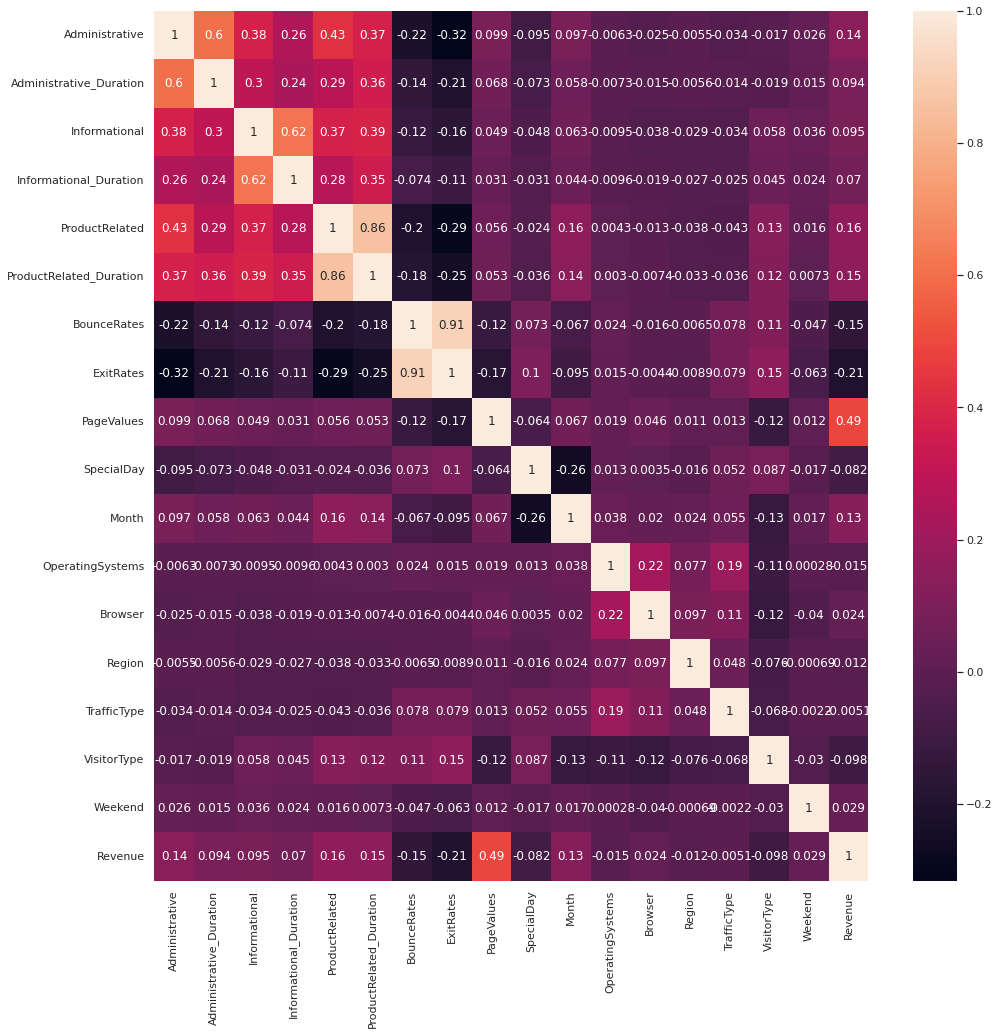

In [334]:
Var_Corr = df.corr()
fig, ax = plt.subplots(figsize=(16,16))  
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

=> Page Values, Exit Rates, Product Related, Product Related Duration and Bounce Rates are most correlated with Revenue Type.
Special Day, Weekend and Visitor type shows less correlation with Revenue.

# Modeling


Adjusting hyperparameters to have the most suitable model

In [335]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [336]:
# Labelling X and y for the test
X=df.drop(columns = ['Revenue'])
y=df['Revenue']

# Creating X_train & Y_train labels
X_train=df.drop(columns = ['Revenue'])
Y_train=y

# Preprocessing Y-train data into integer type
from sklearn import preprocessing
from sklearn import utils
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(Y_train)

# Defining Random Forest Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,training_scores_encoded)

importances = clf.feature_importances_

#Sorting 
sorted_feature_importance = sorted(zip(importances, list(X_train)),
reverse=True)

feature_imp2 = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)

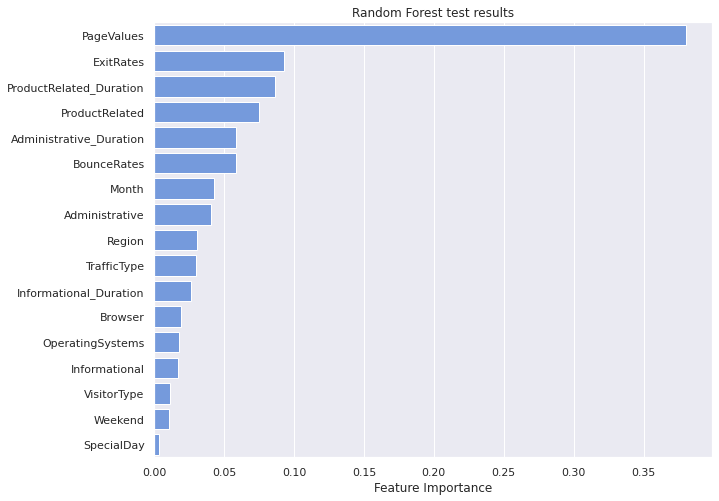

In [337]:
fig, ax = plt.subplots(figsize=(10,8))
ax=sns.barplot(x=feature_imp2, y=feature_imp2.index, color = 'CornflowerBlue')
ax.set_title('Random Forest test results')
ax.set(xlabel='Feature Importance');

=> Page Values, Exit Rates, Product Related, Product Related Duration and Bounce Rates are most correlated with Revenue Type.

## Implementation of Clustering Algorithms

In [338]:
df_cluster = df.drop(['Month','VisitorType', 'Revenue'], axis=1)
df_cluster.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,1


In [339]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(df_cluster)

### 1. K-Means Algorithm

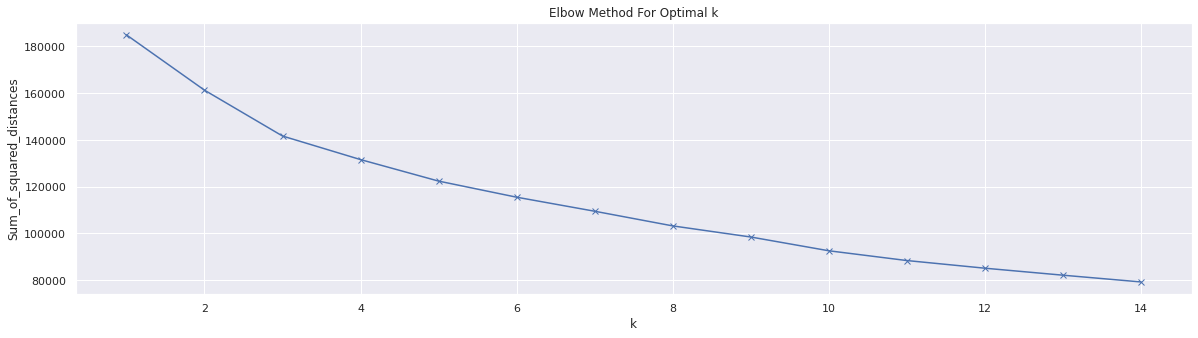

In [340]:
# importing kmeans library
from sklearn.cluster import KMeans

# Elbow method to determine optimal k clusters
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cluster_scaled)
    Sum_of_squared_distances.append(km.inertia_)
plt.figure(figsize=(20,5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

=> The optimal K value is found to be 2

In [341]:
def paramatrer_k(df_cluster, mbk_means_labels):
    from sklearn import metrics
    labels_unique = np.unique(mbk_means_labels)
    n_clusters_mK = len(labels_unique)
    Si_mK=metrics.silhouette_score(df_cluster, mbk_means_labels, metric='euclidean').round(3)
    DB_mK=metrics.davies_bouldin_score(df_cluster, mbk_means_labels).round(3)
    CH_mK=metrics.calinski_harabasz_score(df_cluster, mbk_means_labels).round(3)

    print('K Means Algorithm Evaluation')
    print()
    print ("Silhoutte Score:" "\n", Si_mK)
    print()
    print("Davies-Bouldin Score:" "\n", DB_mK)
    print()
    print ("Calinski-Harabasz Score:" "\n", CH_mK)
    print()
    print("Number of clusters:" "\n", n_clusters_mK)
    return Si_mK, DB_mK, CH_mK, n_clusters_mK

In [342]:
def plt_scatter3D(df_cluster, mbk_means_labels):
    fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
    ax = plt.axes(projection="3d")

    ax.scatter3D(df_cluster['ProductRelated_Duration'],df_cluster['ProductRelated'],df_cluster['PageValues'],c=mbk_means_labels, cmap='rainbow')

    xLabel = ax.set_xlabel('ProductRelated_Duration', linespacing=3.8)
    yLabel = ax.set_ylabel('ProductRelated', linespacing=3.8)
    zLabel = ax.set_zlabel('PageValues', linespacing=3.4)

    print("Mini Batch K-Means Algorithm")

K Means Algorithm Evaluation

Silhoutte Score:
 0.571

Davies-Bouldin Score:
 1.061

Calinski-Harabasz Score:
 4895.52

Number of clusters:
 2
Mini Batch K-Means Algorithm


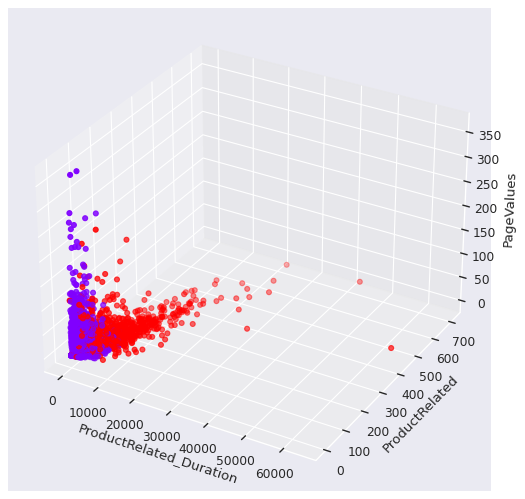

In [343]:
cluster_scaled = scaler.fit_transform(df_cluster)
model = KMeans(n_clusters=2)
model.fit(cluster_scaled)
kmeans_labels = model.labels_

Si_K, DB_K, CH_K, n_clusters_K = paramatrer_k(df_cluster, kmeans_labels)
plt_scatter3D(df_cluster, kmeans_labels )

#### Handing with Outlier

In [344]:
# Removing (statistical) outliers for Administrative_Duration
def handing_outlier(df_, column):
    Q1 = df_[column].quantile(0.05)
    Q3 = df_[column].quantile(0.95)
    IQR = Q3 - Q1
    df_ = df_[(df_[column] >= Q1 - 1.5*IQR) & (df_[column] <= Q3 + 1.5*IQR)]
    return df_

In [345]:
df_1 = df.copy()
df_1 = handing_outlier(df_1, 'ProductRelated_Duration')
df_1 = handing_outlier(df_1, 'ProductRelated')
df_1 = handing_outlier(df_1, 'PageValues')

K Means Algorithm Evaluation

Silhoutte Score:
 0.427

Davies-Bouldin Score:
 1.152

Calinski-Harabasz Score:
 5427.918

Number of clusters:
 2
Mini Batch K-Means Algorithm


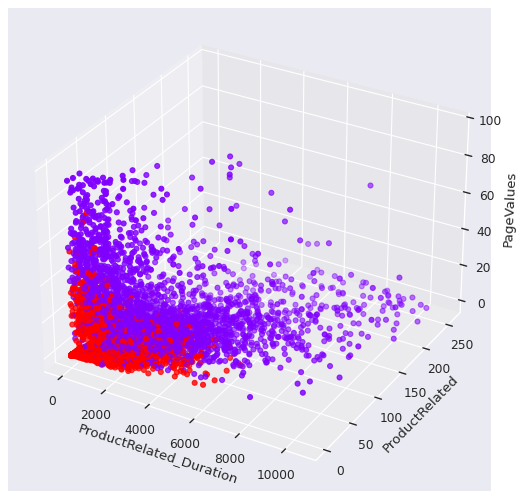

In [346]:
# Cluster visualization using the best features
cluster_scaled = scaler.fit_transform(df_1)
model = KMeans(n_clusters=2)
model.fit(cluster_scaled)
kmeans_labels = model.labels_

Si_K, DB_K, CH_K, n_clusters_K = paramatrer_k(df_1, kmeans_labels)
plt_scatter3D(df_1, kmeans_labels )

# kMeans_model(df_1)

In [347]:
def ptl_subplots_adjust(df_1, kmeans_labels, labels):
    df_clustered_kmeans = df_1.assign(Cluster=kmeans_labels)
    grouped_kmeans = df_clustered_kmeans.groupby(['Cluster']).mean().round(1)
    grouped_kmeans

    fig, axs = plt.subplots(1,3, figsize = (15,5))

    sns.barplot(x=grouped_kmeans.index, y=grouped_kmeans.ProductRelated_Duration, ax = axs[0])
    sns.barplot(x=grouped_kmeans.index, y=grouped_kmeans.ProductRelated, ax = axs[1])
    sns.barplot(x=grouped_kmeans.index, y=grouped_kmeans.PageValues, ax = axs[2])            
    plt.suptitle(labels,y=1.08, fontsize=16)
    plt.subplots_adjust(wspace = 0.4, hspace = 0.3, top = 0.9)

    plt.show()

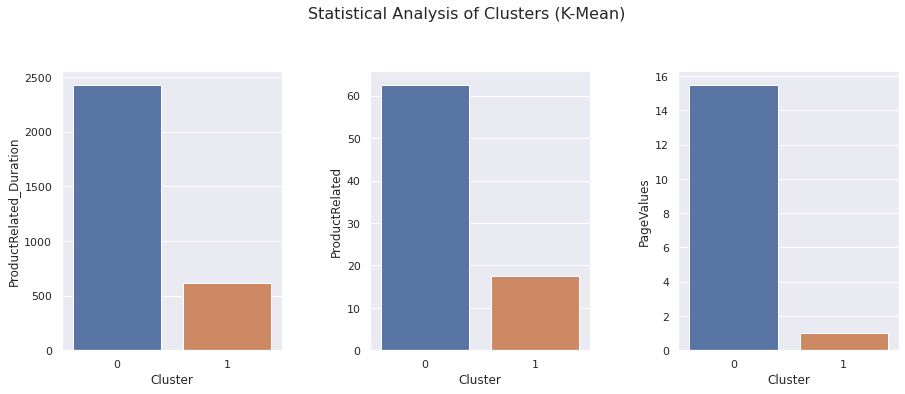

In [348]:
ptl_subplots_adjust(df_1, kmeans_labels, labels = 'Statistical Analysis of Clusters (K-Mean)')

In [349]:
# Class label
target = df_1['Revenue']
class_label = np.asarray(target)

In [350]:
def K_Validation( mbk_means_labels, labels):
    AMI_mK = metrics.adjusted_mutual_info_score(class_label, mbk_means_labels)
    ARI_mK = metrics.adjusted_rand_score(class_label, mbk_means_labels)
    comp_mK = metrics.completeness_score(class_label, mbk_means_labels)
    homo_mK = metrics.homogeneity_score(class_label, mbk_means_labels)
    MI_mK = metrics.mutual_info_score(class_label, mbk_means_labels)

    print(labels)
    print()
    print ("Adjusted Mutual Info Score:" "\n", AMI_mK)
    print("Adjusted Random Score:" "\n", ARI_mK)
    print ("Mutual Information Score:" "\n", MI_mK)
    print("Completeness Score:" "\n", comp_mK)
    print("Homogeneity Score:" "\n", homo_mK)
    return AMI_mK, ARI_mK, MI_mK, comp_mK, homo_mK

In [351]:
from sklearn import metrics
model = KMeans(n_clusters=2)
model.fit(cluster_scaled)
kmeans_labels = model.labels_

AMI_K, ARI_K, MI_K, comp_K, homo_K = K_Validation(kmeans_labels, labels= 'K Means Algorithm External Validation Scores')

K Means Algorithm External Validation Scores

Adjusted Mutual Info Score:
 0.21240000776671855
Adjusted Random Score:
 0.3332723509722876
Mutual Information Score:
 0.10608316953435298
Completeness Score:
 0.18316420679436538
Homogeneity Score:
 0.2529254273441035


### 2. Mini Batch K-Means Algorithm

I will be using n_clusters=2 just like for k-mean algorithm

K Means Algorithm Evaluation

Silhoutte Score:
 0.357

Davies-Bouldin Score:
 3.897

Calinski-Harabasz Score:
 438.93

Number of clusters:
 2
Mini Batch K-Means Algorithm


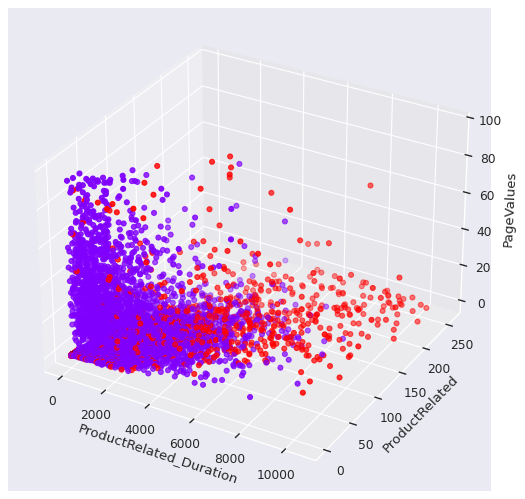

In [352]:
from sklearn.metrics.pairwise import pairwise_distances_argmin 
from sklearn.cluster import MiniBatchKMeans
batch_size = 45

# perform the mini batch K-means 
mbk = MiniBatchKMeans(init ='k-means++', n_clusters = 2, 
                      batch_size = batch_size, n_init = 10, 
                      max_no_improvement = 10, verbose = 0) 
  
mbk.fit(cluster_scaled) 
mbk_means_cluster_centers = np.sort(mbk.cluster_centers_, axis = 0) 
mbk_means_labels = pairwise_distances_argmin(cluster_scaled, mbk_means_cluster_centers) 

Si_mK, DB_mK, CH_mK, n_clusters_mK = paramatrer_k(df_1, mbk_means_labels)
plt_scatter3D(df_1, mbk_means_labels )

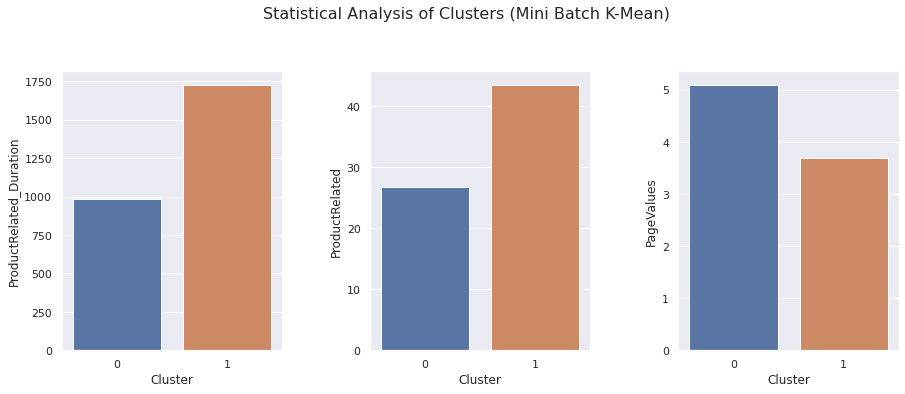

In [353]:
ptl_subplots_adjust(df_1, mbk_means_labels, labels = 'Statistical Analysis of Clusters (Mini Batch K-Mean)')

In [354]:
mbk = MiniBatchKMeans(init ='k-means++', n_clusters = 2, 
                       batch_size = batch_size, n_init = 10, 
                      max_no_improvement = 10, verbose = 0) 
  
mbk.fit(cluster_scaled) 
mbk_means_cluster_centers = np.sort(mbk.cluster_centers_, axis = 0) 
mbk_means_labels = pairwise_distances_argmin(cluster_scaled, mbk_means_cluster_centers)

AMI_mK, ARI_mK, MI_mK, comp_mK, homo_mK = K_Validation(mbk_means_labels,  labels= 'Mini Batch K Means Algorithm External Validation Scores')


Mini Batch K Means Algorithm External Validation Scores

Adjusted Mutual Info Score:
 0.02234637650087509
Adjusted Random Score:
 0.10328979928729908
Mutual Information Score:
 0.008100224686204652
Completeness Score:
 0.026827328983083636
Homogeneity Score:
 0.019312703413128313


### 3. External Validation for Mean Shift Algorithm

K Means Algorithm Evaluation

Silhoutte Score:
 0.308

Davies-Bouldin Score:
 1.591

Calinski-Harabasz Score:
 2679.502

Number of clusters:
 2
Mini Batch K-Means Algorithm


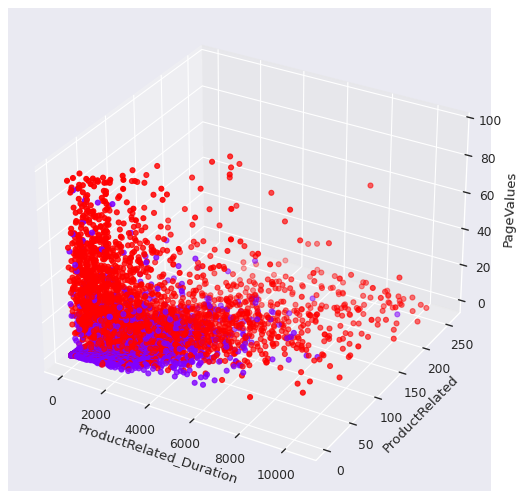

In [355]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=2)
model.fit(cluster_scaled)
hac_labels = model.labels_

Si_hac, DB_hac, CH_hac, n_clusters_hac = paramatrer_k(df_1, hac_labels)

plt_scatter3D(df_1, hac_labels )


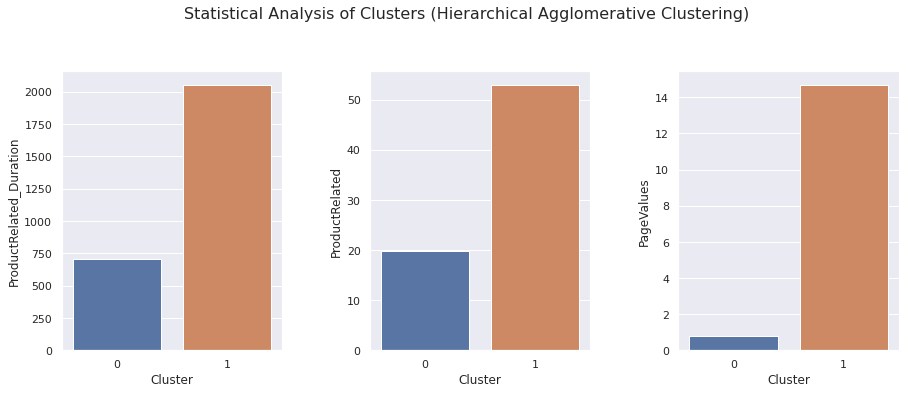

In [356]:
ptl_subplots_adjust(df_1, hac_labels, labels = 'Statistical Analysis of Clusters (Hierarchical Agglomerative Clustering)')

In [357]:
# External Validation 
AMI_hac, ARI_hac, MI_hac, comp_hac, homo_hac = K_Validation(hac_labels,  labels= 'Hierarchical Agglomerative Clustering External Validation Scores')

Hierarchical Agglomerative Clustering External Validation Scores

Adjusted Mutual Info Score:
 0.357434356856973
Adjusted Random Score:
 0.4276039511472329
Mutual Information Score:
 0.18260840276325802
Completeness Score:
 0.30323530857034264
Homogeneity Score:
 0.4353782839281085


### 4. Gaussian Mixture Models


In [358]:
from sklearn import metrics
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(cluster_scaled)
gmm_labels = gmm.predict(cluster_scaled)


K Means Algorithm Evaluation

Silhoutte Score:
 0.239

Davies-Bouldin Score:
 1.666

Calinski-Harabasz Score:
 2297.961

Number of clusters:
 2
Mini Batch K-Means Algorithm


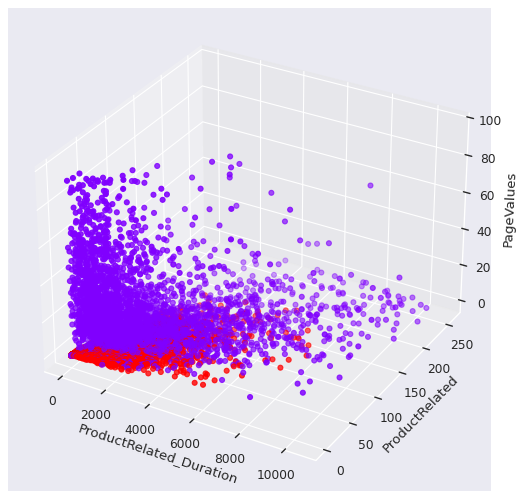

In [359]:
Si_gmm, DB_gmm, CH_gmm, n_clusters_gmm = paramatrer_k(df_1, gmm_labels)

plt_scatter3D(df_1, gmm_labels )

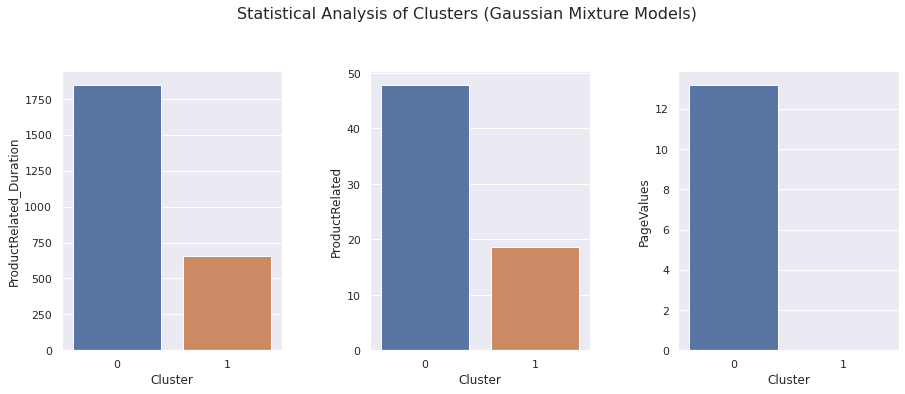

In [360]:
ptl_subplots_adjust(df_1, gmm_labels, labels = 'Statistical Analysis of Clusters (Gaussian Mixture Models)')

In [361]:
# External Validation 
AMI_gmm, ARI_gmm, MI_gmm, comp_gmm, homo_gmm = K_Validation(gmm_labels,  labels= 'Gaussian Mixture Models External Validation Scores')

Gaussian Mixture Models External Validation Scores

Adjusted Mutual Info Score:
 0.318013765745002
Adjusted Random Score:
 0.28909308757221736
Mutual Information Score:
 0.17133636924145795
Completeness Score:
 0.26041365237085423
Homogeneity Score:
 0.4085032960478199


## Comparer 

In [362]:
table = pd.DataFrame({'Algorithm': ['K-Mean Clustering', 'Mini Batch K- Mean',
                                    'Hierarchical Agglomerative Clustering','Guassian Mixture Models'], 
                      'No. of Clusters': [n_clusters_K,n_clusters_mK,n_clusters_hac,n_clusters_gmm], 
                      'Silhoutte Score': [Si_K,Si_mK,Si_hac,Si_gmm],
                      'Davies-Bouldin Score': [DB_K,DB_mK,DB_hac,DB_gmm],
                      'Calinski-Harabasz Score': [CH_K,CH_mK,CH_hac,CH_gmm]})

print(' Internal Cluster Validation Scores Summary')
table.round(3)

 Internal Cluster Validation Scores Summary


,Algorithm,No. of Clusters,Silhoutte Score,Davies-Bouldin Score,Calinski-Harabasz Score
0,K-Mean Clustering,2,0.427,1.152,5427.918
1,Mini Batch K- Mean,2,0.357,3.897,438.930
2,Hierarchical Agglomerative Clustering,2,0.308,1.591,2679.502
3,Guassian Mixture Models,2,0.239,1.666,2297.961


- Silhouette index is normalized and a value close to 1 is considered good

- Davies-Bouldin Score is defined as a ratio between the cluster scatter and the cluster’s separation and a lower value will mean that the clustering is better.

- Calinski-Harabasz Score is a hueristic value, the higher the value, the better is the solution.

=> K-Mean Clustering and Mini Batch K- Mean are the better

In [363]:
table2 = pd.DataFrame({'Algorithm': ['K-Mean Clustering', 'Mini Batch K- Mean',
                                    'Hierarchical Agglomerative Clustering','Guassian Mixture Models'], 
                      'Adjusted Mutual Info Score': [AMI_K,AMI_mK,AMI_hac,AMI_gmm], 
                      'Adjusted Random Score': [ARI_K,ARI_mK,ARI_hac,ARI_gmm],
                       'Mutual Information Score': [MI_K,MI_mK,MI_hac,MI_gmm],
                      'Completeness Score': [comp_K,comp_mK,comp_hac,comp_gmm],
                       'Homogeneity Score': [homo_K,homo_mK,homo_hac,homo_gmm]})

print('External Cluster Validation Scores Summary')
table2.round(3)

External Cluster Validation Scores Summary


,Algorithm,Adjusted Mutual Info Score,Adjusted Random Score,Mutual Information Score,Completeness Score,Homogeneity Score
0,K-Mean Clustering,0.212,0.333,0.106,0.183,0.253
1,Mini Batch K- Mean,0.022,0.103,0.008,0.027,0.019
2,Hierarchical Agglomerative Clustering,0.357,0.428,0.183,0.303,0.435
3,Guassian Mixture Models,0.318,0.289,0.171,0.260,0.409


=> K-Mean Clustering and Mini Batch K- Mean are the best model

## Analysis and Report

### K-Mean Clustering

In [364]:
# adding cluster labels to original dataset
df2 = df_1.copy()
df2['cluster_group'] = np.nan
data_length=len(df2)
for i in range(data_length):
    df2.iloc[i,df2.columns.get_loc('cluster_group')] = kmeans_labels[i]
df2.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,cluster_group
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,3,0,0,0.0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,3,0,0,0.0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,3,0,0,0.0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,3,0,0,0.0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,3,1,0,0.0


Comparison of clusters label distribution and true labels

Text(0.5, 1.0, 'Class label Distribution')

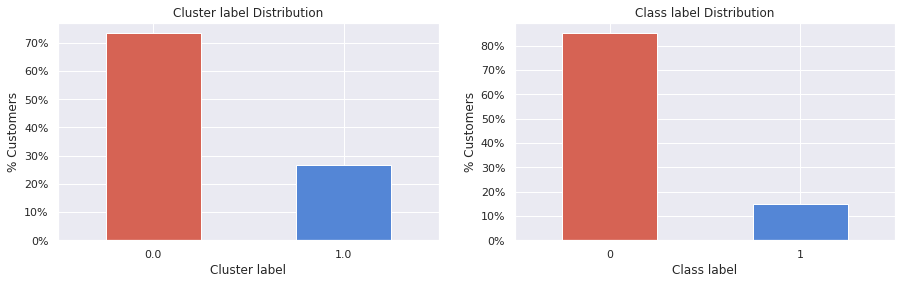

In [365]:
colors = ['#d66354','#5486d6']
plt.figure(figsize = (15,4))
ax = plt.subplot(121)

ax = (df2['cluster_group'].value_counts()*100.0 /len(df2)).plot(kind='bar', stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Cluster label')
ax.set_title('Cluster label Distribution')

ax1 = plt.subplot(122)
ax1 = (df2['Revenue'].value_counts()*100.0 /len(df2)).plot(kind='bar', stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax1.set_ylabel('% Customers')
ax1.set_xlabel('Class label')
ax1.set_title('Class label Distribution')

In [366]:
def nanalyses_col(col = 'Region'):
    plt.figure(figsize = (15,4))
    ax = plt.subplot(121)
    ax = sns.countplot(x=col, data=df2, 
                  palette="seismic", hue="cluster_group")
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Count of customers", fontsize=12)
    ax.set_title(col +" by Cluster Labels", fontsize=14)

    ax1 = plt.subplot(122)
    ax1 = sns.countplot(x=col, data=df2, 
                  palette="seismic", hue="Revenue")
    ax1.set_xlabel(col, fontsize=12)
    ax1.set_ylabel("Count of customers", fontsize=12)
    ax1.set_title(col + " by True Labels", fontsize=14)

Months by cluster labels and true labels

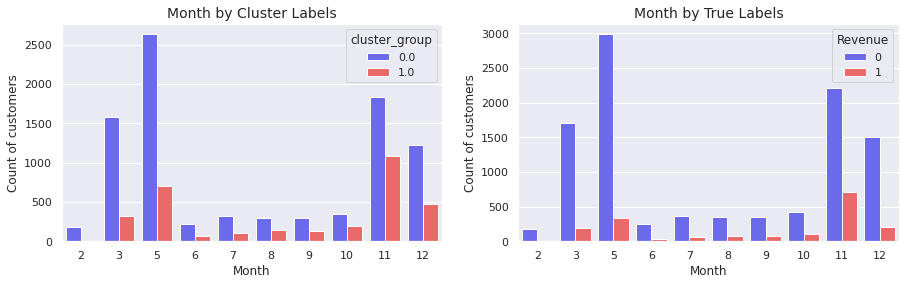

In [367]:
nanalyses_col(col = 'Month')

Weekend Analysis by cluster labels and true labels

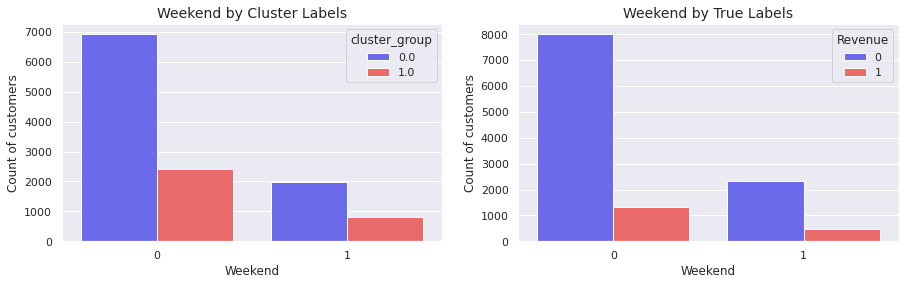

In [368]:
nanalyses_col(col = 'Weekend')

Region by cluster and true labels

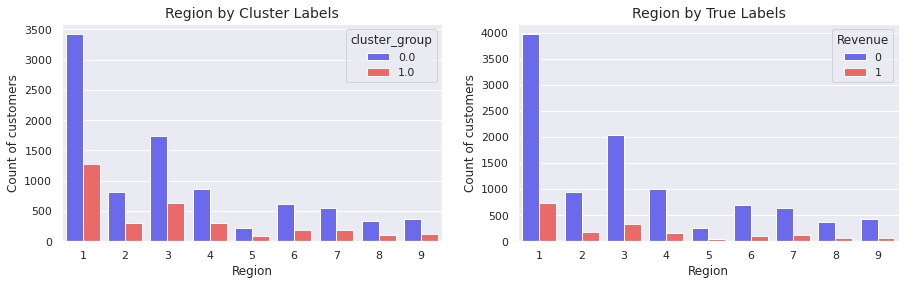

In [369]:
nanalyses_col(col = 'Region')

### Mini Batch K- Mean

In [370]:
# adding cluster labels to original dataset

df2['cluster_group2'] = np.nan
data_length=len(df2)
for i in range(data_length):
    df2.iloc[i,df2.columns.get_loc('cluster_group2')] = mbk_means_labels[i]
df2.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,cluster_group,cluster_group2
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,3,0,0,0.0,0.0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,3,0,0,0.0,0.0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,3,0,0,0.0,0.0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,3,0,0,0.0,0.0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,3,1,0,0.0,0.0


Text(0.5, 1.0, 'Class label Distribution')

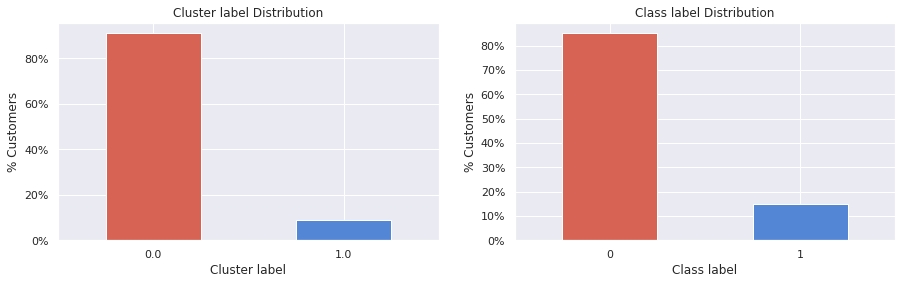

In [371]:
colors = ['#d66354','#5486d6']
plt.figure(figsize = (15,4))
ax = plt.subplot(121)

ax = (df2['cluster_group2'].value_counts()*100.0 /len(df2)).plot(kind='bar', stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Cluster label')
ax.set_title('Cluster label Distribution')

ax1 = plt.subplot(122)
ax1 = (df2['Revenue'].value_counts()*100.0 /len(df2)).plot(kind='bar', stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax1.set_ylabel('% Customers')
ax1.set_xlabel('Class label')
ax1.set_title('Class label Distribution')

In [372]:
def nanalyses_col2(col = 'Region'):
    plt.figure(figsize = (15,4))
    ax = plt.subplot(121)
    ax = sns.countplot(x=col, data=df2, 
                  palette="seismic", hue="cluster_group2")
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Count of customers", fontsize=12)
    ax.set_title(col +" by Cluster Labels", fontsize=14)

    ax1 = plt.subplot(122)
    ax1 = sns.countplot(x=col, data=df2, 
                  palette="seismic", hue="Revenue")
    ax1.set_xlabel(col, fontsize=12)
    ax1.set_ylabel("Count of customers", fontsize=12)
    ax1.set_title(col + " by True Labels", fontsize=14)

Months by cluster labels and true labels

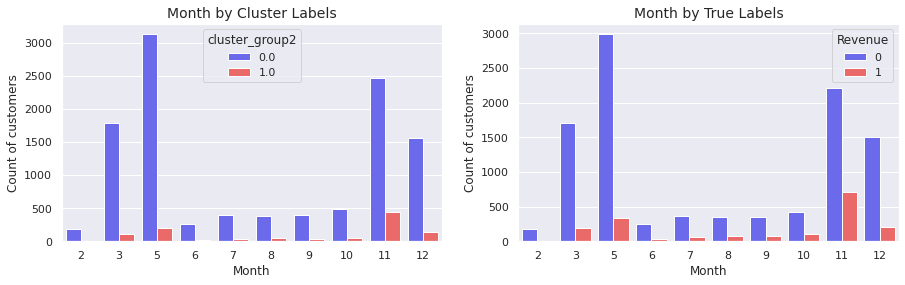

In [373]:
nanalyses_col2(col = 'Month')

Weekend Analysis by cluster labels and true labels

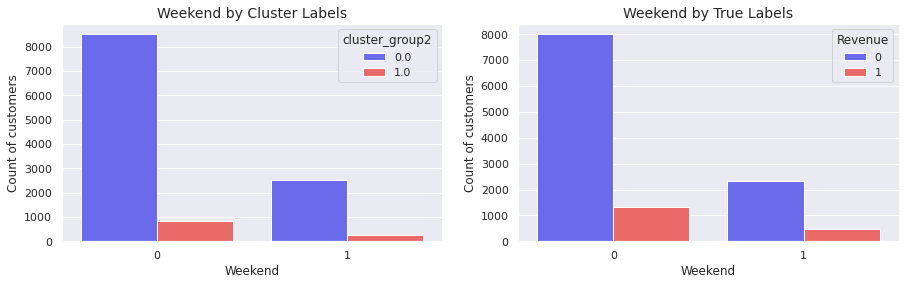

In [374]:
nanalyses_col2(col = 'Weekend')

Region by cluster and true labels

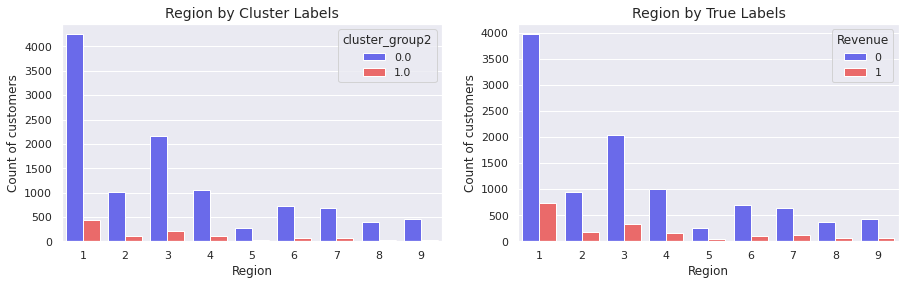

In [375]:
nanalyses_col2(col = 'Region')